In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

,ResponseId,TargetId,QualtricsId,IPAddress,Latitude,Longitude,StartDate_1,EndDate_1,StartDate_2,EndDate_2,...,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,1,1,R_12unZMHjJEzjU7w,223.38.21.205,37.598495,126.978302,3/17/20 12:32,3/17/20 12:40,3/17/20 12:40,3/17/20 12:47,...,22.0,21.0,43.0,19.0,55.0,12.0,21.0,28.0,22.0,41.0
1,2,2,R_1MPUDZpgLwIxe1A,175.223.22.95,37.598495,126.978302,3/18/20 11:17,3/18/20 11:25,3/18/20 11:26,3/18/20 11:29,...,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,R_29nM2ZnVIpXduHk,183.104.122.33,35.268005,128.839813,3/18/20 10:29,3/18/20 10:42,3/18/20 10:42,3/18/20 11:17,...,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
3,4,2,R_2BsWkDHnnRpZoQ3,211.109.158.40,37.598495,126.978302,3/17/20 21:46,3/17/20 21:59,3/17/20 21:59,3/17/20 22:06,...,18.0,12.0,30.0,20.0,48.0,14.0,10.0,25.0,22.0,35.0
4,5,2,R_27NBh3oSecWIT6D,211.224.126.112,35.872299,128.592407,3/18/20 10:19,3/18/20 10:35,3/18/20 10:36,3/18/20 10:46,...,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0


In [ ]:
# Read data
data = pd.read_csv('results_compilation.csv')
data.head()

In [40]:
# Data Frame Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 64 columns):
ResponseId       90 non-null int64
TargetId         90 non-null int64
QualtricsId      90 non-null object
IPAddress        90 non-null object
Latitude         90 non-null float64
Longitude        90 non-null float64
StartDate_1      89 non-null object
EndDate_1        89 non-null object
StartDate_2      77 non-null object
EndDate_2        77 non-null object
StartDate_3      71 non-null object
EndDate_3        71 non-null object
Complete         90 non-null bool
ID               90 non-null object
SurveyType       90 non-null int64
Relationship     47 non-null float64
Age              89 non-null float64
Gender           90 non-null object
Religion         89 non-null float64
Duration_1       89 non-null float64
Duration_2       77 non-null float64
Duration_3       71 non-null float64
DurationTotal    72 non-null float64
guess_1          53 non-null float64
guess_2          42 non-null

In [ ]:
# Number of NULL data for each column
data.isnull().sum()

In [6]:
# Column Values
print(data.columns.values)

['ResponseId' 'TargetId' 'QualtricsId' 'IPAddress' 'Latitude' 'Longitude'
 'StartDate_1' 'EndDate_1' 'StartDate_2' 'EndDate_2' 'StartDate_3'
 'EndDate_3' 'Complete' 'ID' 'SurveyType' 'Relationship' 'Age' 'Gender'
 'Religion' 'Duration_1' 'Duration_2' 'Duration_3' 'DurationTotal'
 'guess_1' 'guess_2' 'guess_3' 'FS' 'BFI_O' 'BFI_C' 'BFI_N' 'BFI_E'
 'BFI_A' 'PCS9' 'ERQ10_c' 'ERQ10_e' 'ERQ10' 'RPS' 'BPAQSF' 'ADHDRS'
 'NPI16' 'RFQ_m' 'RFQ_v' 'RFQ' 'LOC13' 'BPSSR_I' 'BPSSR_I5' 'BPSSR_E'
 'BPSSR_Amb' 'BPSSR' 'BRCS' 'CAMSR' 'CEI' 'BRS' 'ZBS' 'SMS_ams' 'SMS_seb'
 'SMS' 'GP5' 'SOAS' 'ESS' 'CR' 'HEXACO60' 'NCS6' 'SAS']


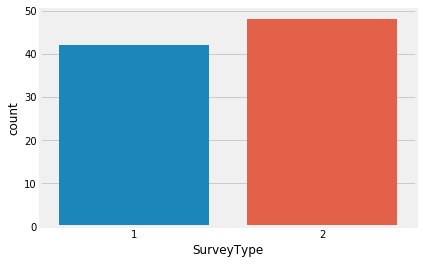

In [12]:
# Number of Responses by Survey Type
sns.countplot('SurveyType', data=data)
plt.show()
# data['SurveyType'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')

In [32]:
# Report on Self
is_self = data[data['SurveyType']==1]
is_self.groupby(['Gender', 'Religion'])['Religion'].count()

Gender  Religion
F       1.0          1
        2.0          7
        3.0          7
        7.0         14
M       2.0          1
        3.0          1
        7.0          9
UND     7.0          2
Name: Religion, dtype: int64

In [38]:
# Report on Other
is_other = data[data['SurveyType']==2]
is_other.groupby(['Gender', 'Relationship'])['Relationship'].count()

Gender  Relationship
F       1.0             22
        2.0             10
        3.0              3
M       1.0              6
        2.0              1
        3.0              5
Name: Relationship, dtype: int64

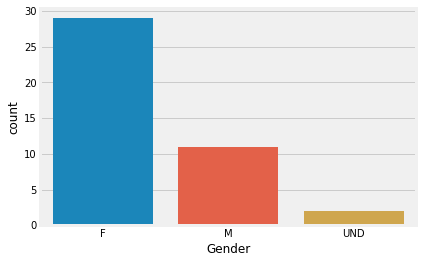

In [36]:
sns.countplot('Gender', data=is_self)
plt.show()

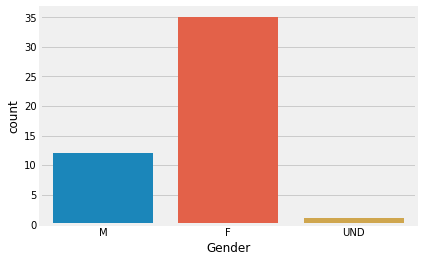

In [39]:
sns.countplot('Gender', data=is_other)
plt.show()

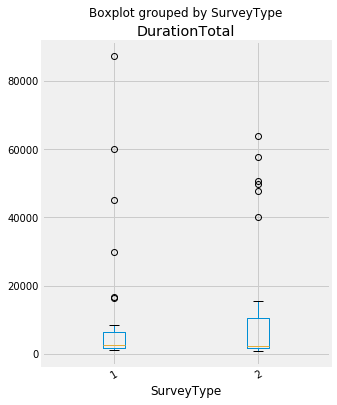

In [42]:
# Elapsed Time by Survey Type
data.boxplot('DurationTotal', 'SurveyType', rot=30, figsize=(5,6))